# NLTK Translation Examples

https://www.nltk.org/howto/translate.html

[nltk_data] Downloading package comtrans to /Users/gen/nltk_data...
[nltk_data]   Package comtrans is already up-to-date!


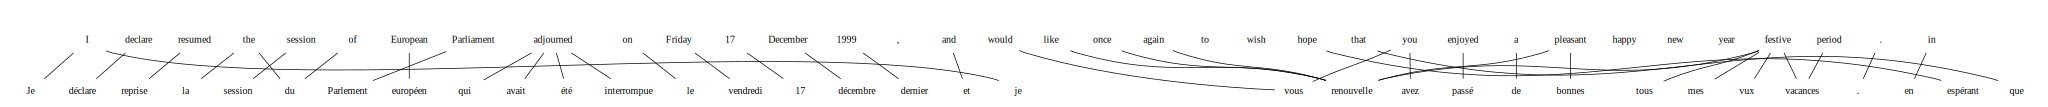

In [8]:
# Supervised/parallel sentences en/fr
# Government style data

import nltk
from nltk.corpus import comtrans
#nltk.download('comtrans')

words = comtrans.words('alignment-en-fr.txt')

"""
# Check out the corpus contents.
for word in words[:50]:
     print(word)
"""

# Aligned Sentence
# An alignment is a translation
# Show how words are alligned across the parallel sentences.
als = comtrans.aligned_sents('alignment-en-fr.txt')[1]
als


In [15]:
# Access en/fr by calling the en/fr version of the datapoint. (words/mots)

print(" ".join(als.words) + "\n")
print(" ".join(als.mots) + "\n")
als.alignment

I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999 , and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period .

Je déclare reprise la session du Parlement européen qui avait été interrompue le vendredi 17 décembre dernier et je vous renouvelle tous mes vux en espérant que vous avez passé de bonnes vacances .



Alignment([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 5), (7, 7), (8, 6), (9, 8), (9, 9), (9, 10), (9, 11), (10, 12), (11, 13), (12, 14), (13, 15), (14, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 20), (21, 20), (29, 24), (31, 25), (32, 26), (33, 27), (33, 28), (34, 29), (35, 30), (36, 20), (36, 31), (37, 20), (37, 21), (37, 22), (37, 23), (37, 32), (38, 32), (39, 33)])

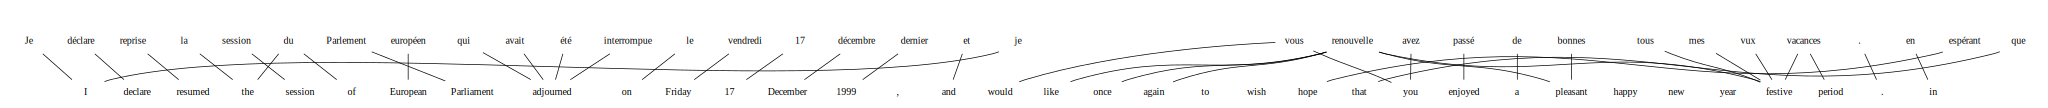

In [20]:
# Target to source
als.invert()


In [22]:
# Inverted alignment 
als.alignment.invert()

Alignment([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (5, 6), (6, 8), (7, 7), (8, 9), (9, 9), (10, 9), (11, 9), (12, 10), (13, 11), (14, 12), (15, 13), (16, 14), (17, 16), (18, 17), (19, 18), (20, 19), (20, 20), (20, 21), (20, 36), (20, 37), (21, 37), (22, 37), (23, 37), (24, 29), (25, 31), (26, 32), (27, 33), (28, 33), (29, 34), (30, 35), (31, 36), (32, 37), (32, 38), (33, 39)])

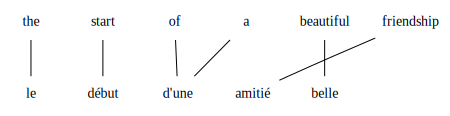

In [43]:
# Create new Alignment object
from nltk.translate import Alignment, AlignedSent
als = AlignedSent(['the', 'start', 'of', 'a', 'beautiful', 'friendship'],
                  ['le', 'début', "d'une", 'amitié', 'belle'],
                  Alignment([(0, 0), (1, 1), (2, 2), (3, 2), (4, 4), (5, 3)]))
als

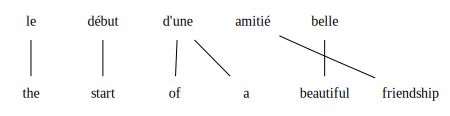

In [35]:
als.invert()

In [36]:
als.mots

['le', 'début', "d'une", 'amitié', 'belle']

In [41]:
als.words

['the', 'start', 'of', 'a', 'beautiful', 'friendship']

In [44]:
als.alignment

Alignment([(0, 0), (1, 1), (2, 2), (3, 2), (4, 4), (5, 3)])

In [48]:
# Garbage is accepted in the alignment tuples. 
test = comtrans.aligned_sents('alignment-en-fr.txt')[0]
test.alignment = Alignment([(0, 0), (1, 1), (2, 2, "boat"), (3, 3, False, (1,2))])
test.alignment

Alignment([(0, 0), (1, 1), (2, 2, 'boat'), (3, 3, False, (1, 2))])

In [50]:
# It messes up the data though of course.
test

ValueError: too many values to unpack (expected 2)

AlignedSent(['Resumption', 'of', 'the', 'session'], ['Reprise', 'de', 'la', 'session'], Alignment([(0, 0), (1, 1), (2, 2, 'boat'), (3, 3, False, (1, 2))]))

In [51]:
# Example:

from nltk.translate import IBMModel1
corpus = [AlignedSent(['the', 'house'], ['das', 'Haus']),
          AlignedSent(['the', 'book'], ['das', 'Buch']),
          AlignedSent(['a', 'book'], ['ein', 'Buch'])]
em_ibm1 = IBMModel1(corpus, 20)
print(round(em_ibm1.translation_table['the']['das'], 1))
print(round(em_ibm1.translation_table['book']['das'], 1))
print(round(em_ibm1.translation_table['house']['das'], 1))
print(round(em_ibm1.translation_table['the']['Buch'], 1))
print(round(em_ibm1.translation_table['book']['Buch'], 1))
print(round(em_ibm1.translation_table['a']['Buch'], 1))
print(round(em_ibm1.translation_table['book']['ein'], 1))
print(round(em_ibm1.translation_table['a']['ein'], 1))
print(round(em_ibm1.translation_table['the']['Haus'], 1))
print(round(em_ibm1.translation_table['house']['Haus'], 1))
print(round(em_ibm1.translation_table['book'][None], 1))


1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.5


In [52]:
from nltk.corpus import comtrans
com_ibm1 = IBMModel1(comtrans.aligned_sents()[:10], 20)
print(round(com_ibm1.translation_table['bitte']['Please'], 1))
print(round(com_ibm1.translation_table['Sitzungsperiode']['session'], 1))

0.2
1.0


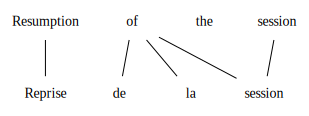

In [57]:
# Evaluation
my_als = AlignedSent(['Resumption', 'of', 'the', 'session'],
    ['Reprise', 'de', 'la', 'session'],
    Alignment([(0, 0), (3, 3), (1, 2), (1, 1), (1, 3)]))

# Poor translation
my_als

In [65]:
# Precision
# https://www.nltk.org/api/nltk.metrics.html#nltk.metrics.scores.precision

print("Precision")
from nltk.metrics import precision
als.alignment = Alignment([(0,0), (1,1), (2,2), (3,3)])
print(f"precision 1: {precision(Alignment([]), als.alignment)}")
print(f"precision 2: {precision(Alignment([(0,0), (1,1), (2,2), (3,3)]), als.alignment)}")
print(f"precision 3: {precision(Alignment([(0,0), (3,3)]), als.alignment)}")
print(f"precision 4: {precision(Alignment.fromstring('0-0 3-3'), als.alignment)}")
print(f"precision 5: {precision(Alignment([(0,0), (1,1), (2,2), (3,3), (1,2), (2,1)]), als.alignment)}")
print(f"precision 6: {precision(als.alignment, my_als.alignment)}")


# Recall
# https://www.nltk.org/api/nltk.metrics.html#nltk.metrics.scores.recall

print("\nRecall")
from nltk.metrics import recall
print(f"recall 1: {recall(Alignment([]), als.alignment)}")
print(f"recall 2: {recall(Alignment([(0,0), (1,1), (2,2), (3,3)]), als.alignment)}")
print(f"recall 3: {recall(Alignment.fromstring('0-0 3-3'), als.alignment)}")
print(f"recall 4: {recall(Alignment([(0,0), (3,3)]), als.alignment)}")
print(f"recall 5: {recall(Alignment([(0,0), (1,1), (2,2), (3,3), (1,2), (2,1)]), als.alignment)}")
print(f"recall 6: {recall(als.alignment, my_als.alignment)}")

print("\nAlignment error rate")
# Alignment error rate
from nltk.translate import alignment_error_rate
print(f"aer 1: {alignment_error_rate(Alignment([]), als.alignment)}")
print(f"aer 1: {alignment_error_rate(Alignment([(0,0), (1,1), (2,2), (3,3)]), als.alignment)}")
print(f"aer 1: {alignment_error_rate(als.alignment, my_als.alignment)}")
print(f"aer 1: {alignment_error_rate(als.alignment, my_als.alignment, als.alignment | Alignment([(1,2), (2,1)]))}")

Precision
precision 1: 0.0
precision 2: 1.0
precision 3: 0.5
precision 4: 0.5
precision 5: 1.0
precision 6: 0.6

Recall
recall 1: None
recall 2: 1.0
recall 3: 1.0
recall 4: 1.0
recall 5: 0.6666666666666666
recall 6: 0.75

Alignment error rate
aer 1: 1.0
aer 1: 0.0
aer 1: 0.33333333333333337
aer 1: 0.2222222222222222
